In [2]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
!pip install -r requirements.txt  # install dependencies


Cloning into 'yolov5'...
remote: Enumerating objects: 17488, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 17488 (delta 0), reused 1 (delta 0), pack-reused 17483 (from 1)
Receiving objects: 100% (17488/17488), 16.55 MiB | 20.65 MiB/s, done.
Resolving deltas: 100% (11995/11995), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 71.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00

In [3]:
!curl -L https://github.com/ultralytics/yolov5/releases/download/v1.0/coco128.zip -o coco128.zip
!unzip -q coco128.zip


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 6819k  100 6819k    0     0  6429k      0  0:00:01  0:00:01 --:--:-- 22.7M


In [4]:
!python train.py --img 640 --batch 16 --epochs 5 --data coco128.yaml --weights yolov5s.pt

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-06-07 06:53:56.359033: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749279236.661120    1083 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749279236.746955    1083 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS wh

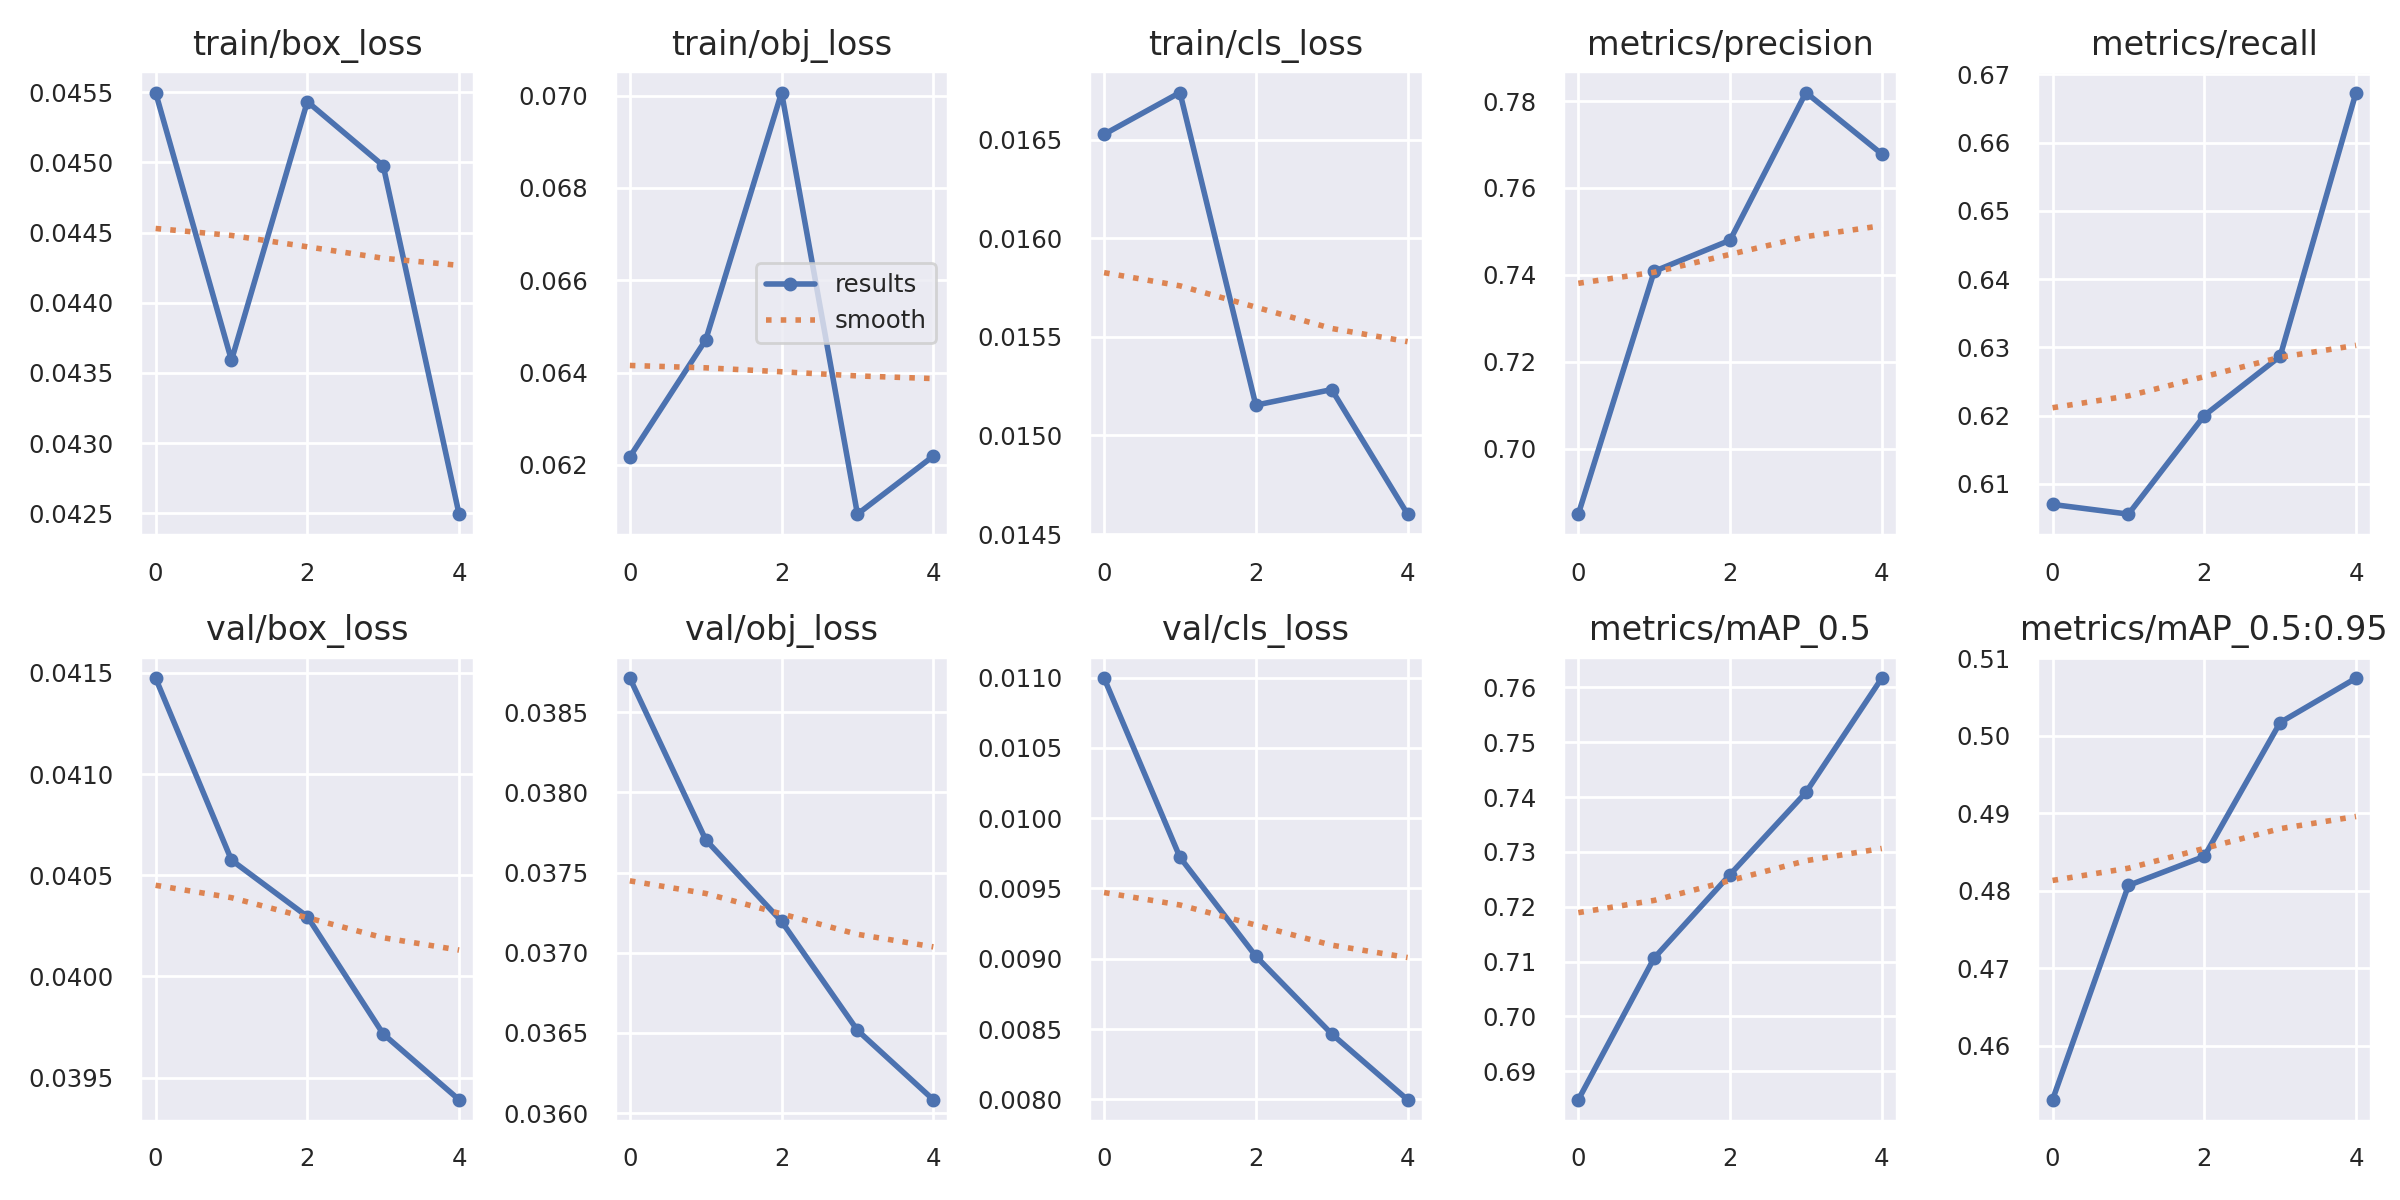

In [5]:
from IPython.display import Image
Image('runs/train/exp/results.png')


In [19]:
%cd /content/yolov5


/content/yolov5


In [20]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source coco128/images/train2017 --project runs/detect --name my_test --exist-ok


detect: weights=['runs/train/exp/weights/best.pt'], source=coco128/images/train2017, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=my_test, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-420-g0c99ce80 Python-3.11.13 torch-2.6.0+cu124 CPU

Fusing layers... 
Model summary: 157 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/128 /content/yolov5/coco128/images/train2017/000000000009.jpg: 480x640 2 bowls, 4 oranges, 2 broccolis, 378.2ms
image 2/128 /content/yolov5/coco128/images/train2017/000000000025.jpg: 448x640 2 giraffes, 321.3ms
image 3/128 /content/yolov5/coco128/images/train2017/000000000030.jpg: 448x640 1 potted plant, 1 vase, 319.2ms


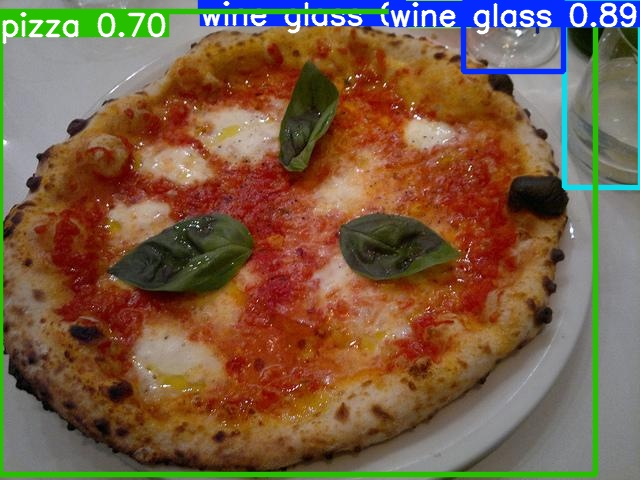

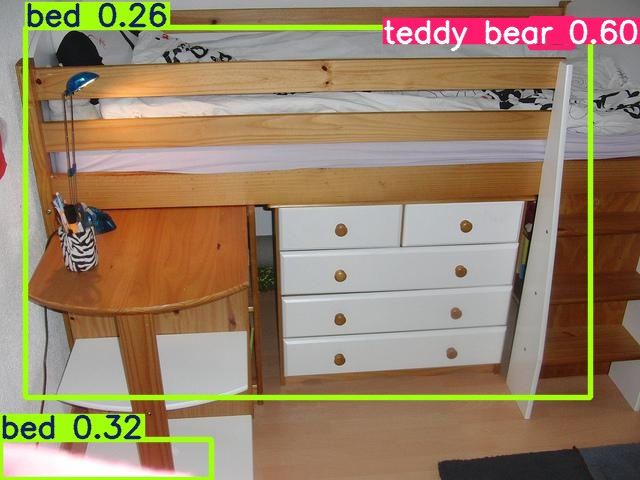

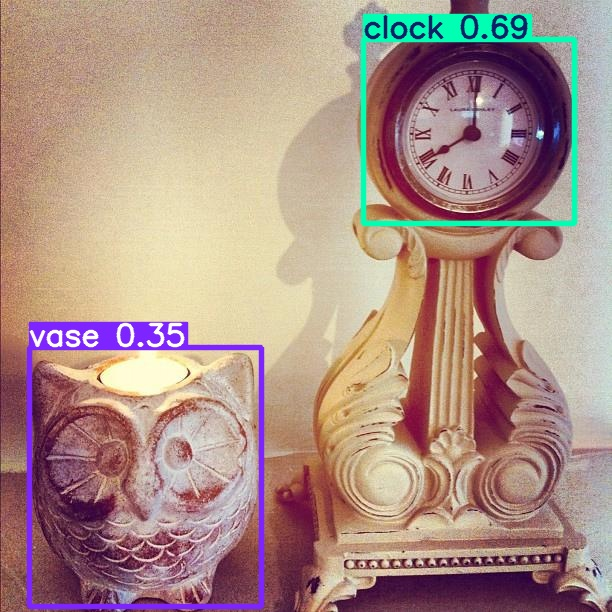

In [21]:
from IPython.display import Image, display
import glob

img_list = glob.glob('runs/detect/my_test/*.jpg')

for img_path in img_list[:3]:
    display(Image(img_path))


In [22]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --source data/images/bus.jpg


detect: weights=['runs/train/exp/weights/best.pt'], source=data/images/bus.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-420-g0c99ce80 Python-3.11.13 torch-2.6.0+cu124 CPU

Fusing layers... 
Model summary: 157 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/1 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 1 tie, 398.3ms
Speed: 2.9ms pre-process, 398.3ms inference, 3.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


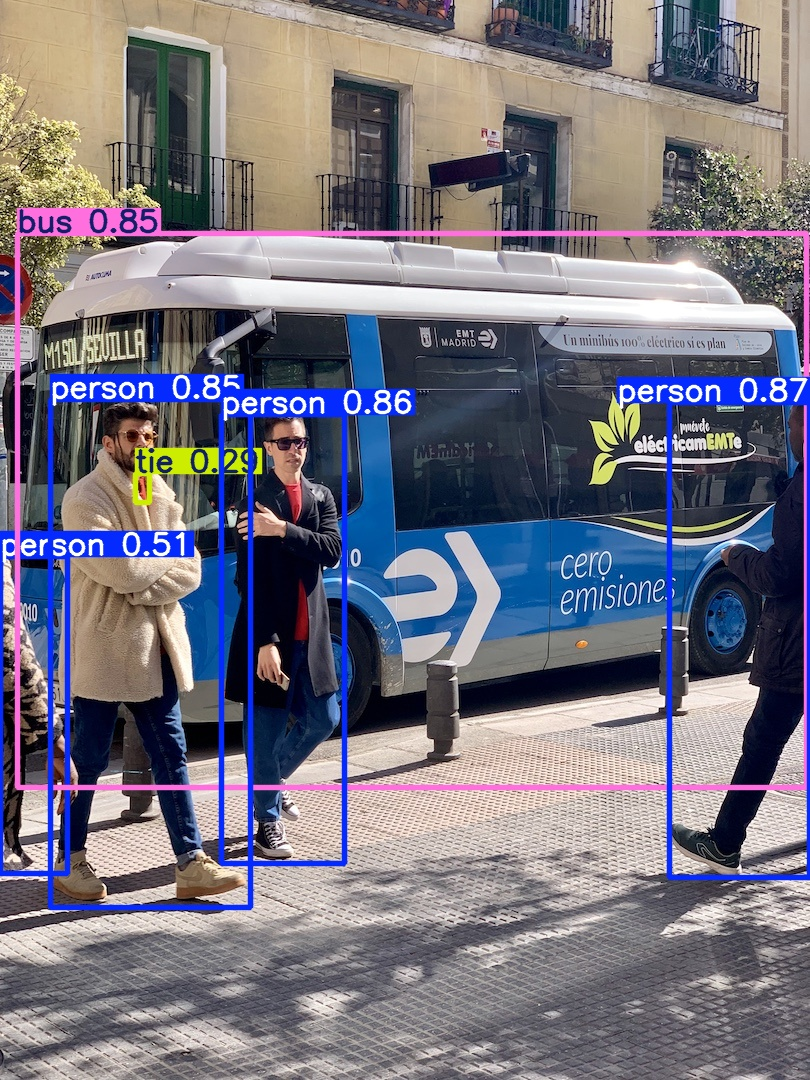

In [23]:
from IPython.display import Image
Image(filename='runs/detect/exp2/bus.jpg')


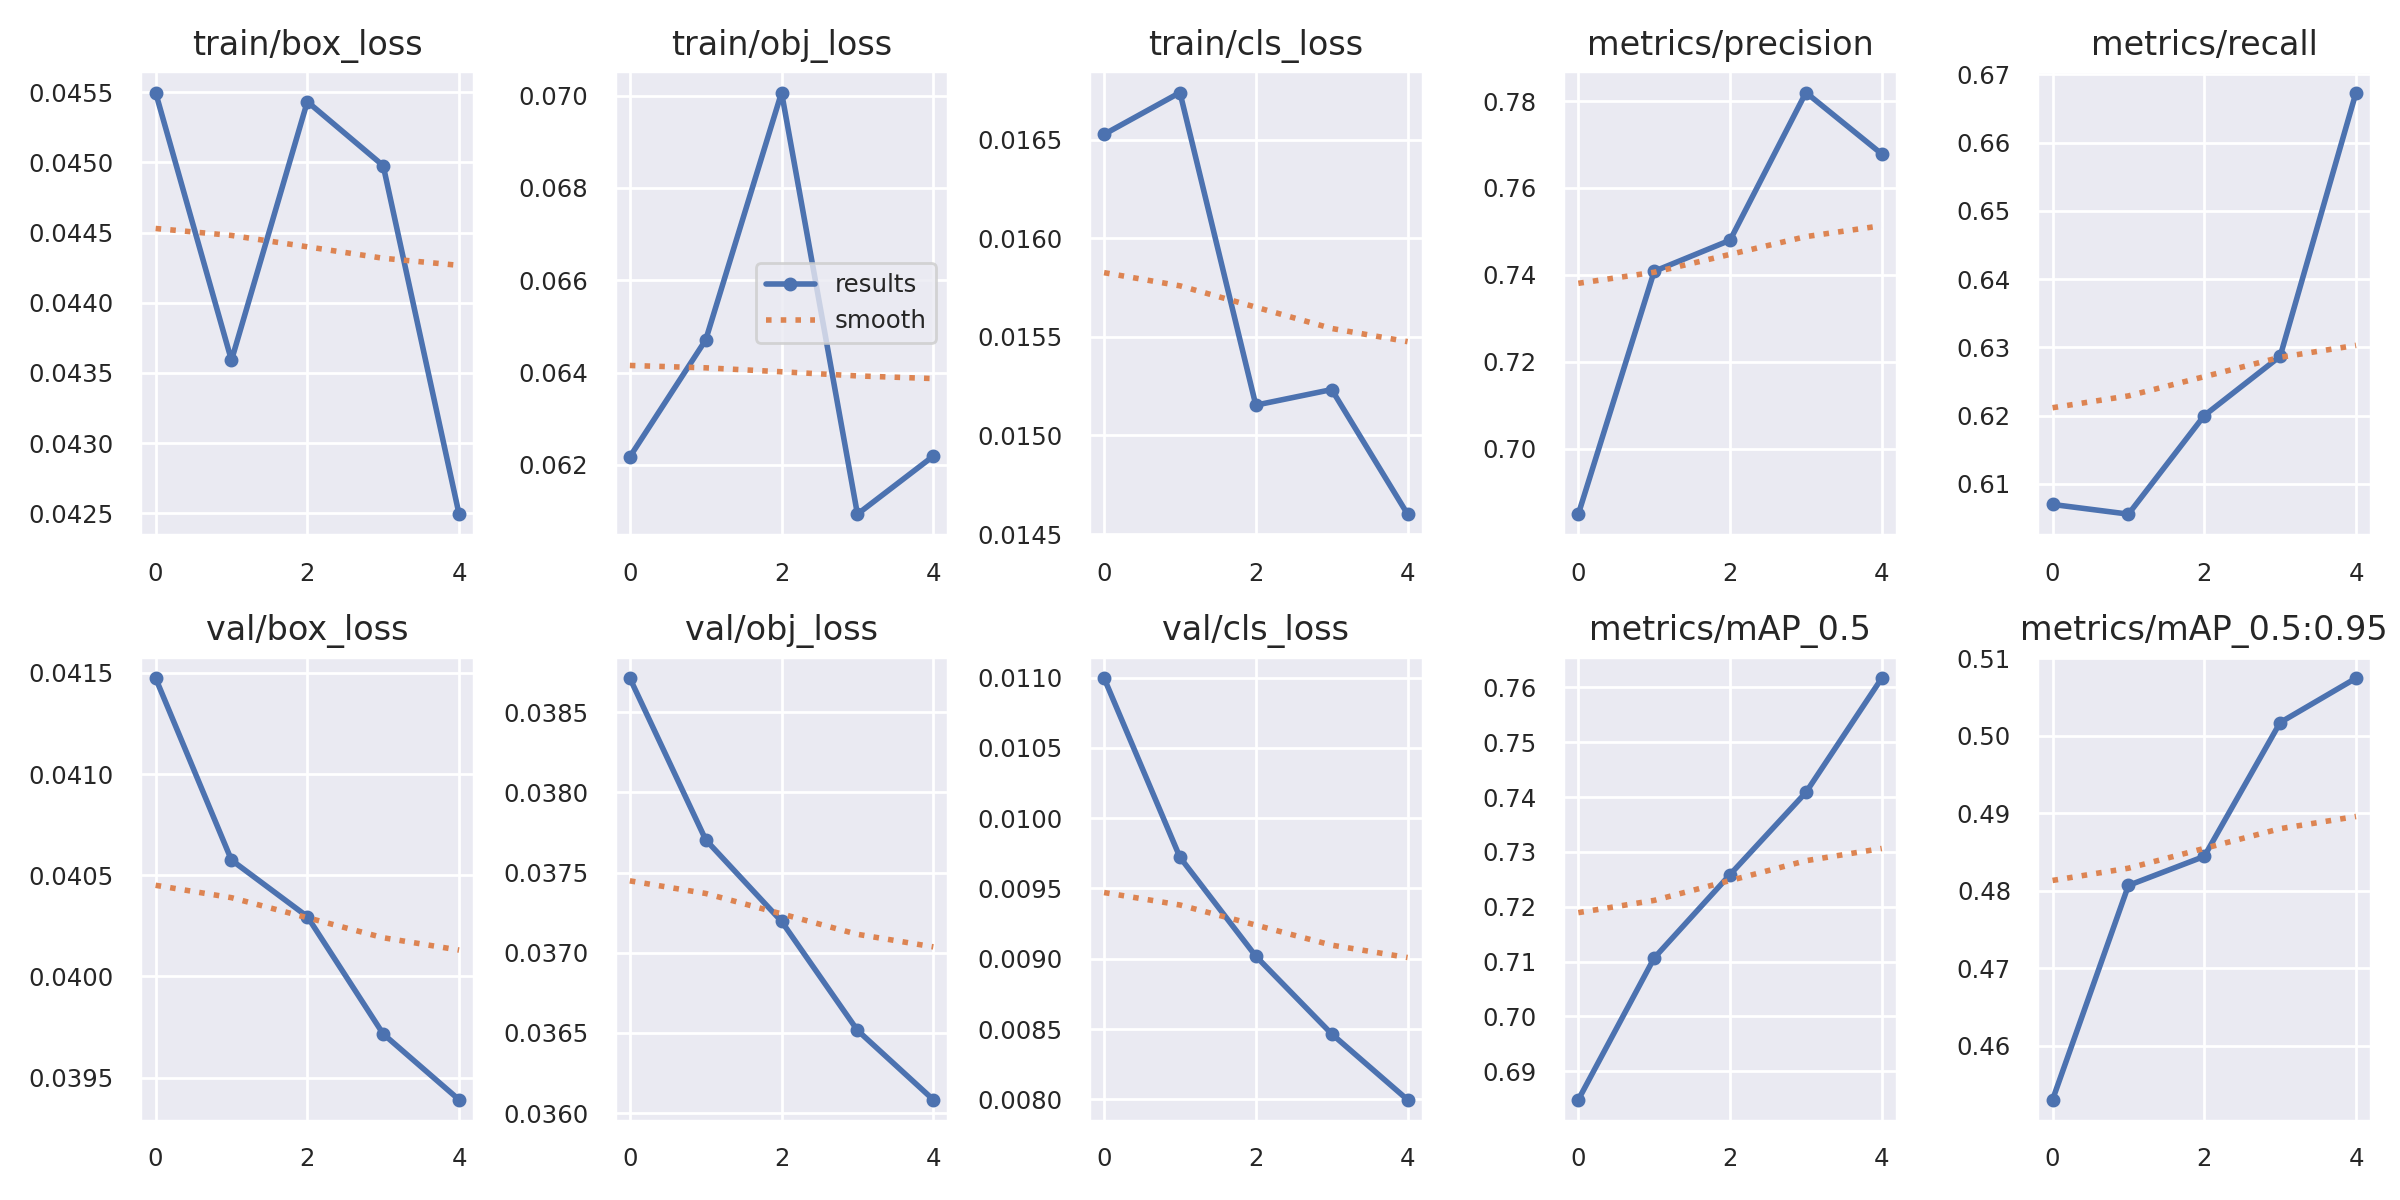

In [28]:
from IPython.display import Image
Image(filename='runs/train/exp/results.png')



In [29]:
!cat runs/train/exp/results.csv

               epoch,      train/box_loss,      train/obj_loss,      train/cls_loss,   metrics/precision,      metrics/recall,     metrics/mAP_0.5,metrics/mAP_0.5:0.95,        val/box_loss,        val/obj_loss,        val/cls_loss,               x/lr0,               x/lr1,               x/lr2
                   0,            0.045498,            0.062175,            0.016528,               0.685,             0.60699,             0.68481,             0.45301,            0.041474,            0.038712,            0.010996,              0.0937,              0.0007,              0.0007
                   1,             0.04359,            0.064708,             0.01674,             0.74084,             0.60557,             0.71067,             0.48069,            0.040575,            0.037704,           0.0097219,            0.086203,            0.001203,            0.001203
                   2,            0.045433,            0.070066,            0.015154,             0.74799,             

In [30]:
import pandas as pd

results_path = "runs/train/exp/results.csv"
df = pd.read_csv(results_path)
df.tail()


,epoch,train/box_loss,train/obj_loss,train/cls_loss,metrics/precision,metrics/recall,metrics/mAP_0.5,metrics/mAP_0.5:0.95,val/box_loss,val/obj_loss,val/cls_loss,x/lr0,x/lr1,x/lr2
0,0,0.045498,0.062175,0.016528,0.68500,0.60699,0.68481,0.45301,0.041474,0.038712,0.010996,0.093700,0.000700,0.000700
1,1,0.043590,0.064708,0.016740,0.74084,0.60557,0.71067,0.48069,0.040575,0.037704,0.009722,0.086203,0.001203,0.001203
2,2,0.045433,0.070066,0.015154,0.74799,0.62002,0.72588,0.48444,0.040296,0.037195,0.009019,0.078389,0.001389,0.001389
3,3,0.044977,0.060934,0.015233,0.78195,0.62870,0.74086,0.50173,0.039716,0.036516,0.008466,0.070259,0.001259,0.001259
4,4,0.042494,0.062191,0.014601,0.76782,0.66734,0.76170,0.50746,0.039391,0.036083,0.007997,0.061811,0.000811,0.000811


In [31]:
from google.colab import files
uploaded = files.upload()


Saving myimage.jpeg to myimage.jpeg


In [32]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --source myimage.jpeg

detect: weights=['runs/train/exp/weights/best.pt'], source=myimage.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-420-g0c99ce80 Python-3.11.13 torch-2.6.0+cu124 CPU

Fusing layers... 
Model summary: 157 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/1 /content/yolov5/myimage.jpeg: 448x640 1 car, 330.8ms
Speed: 2.8ms pre-process, 330.8ms inference, 1.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp3


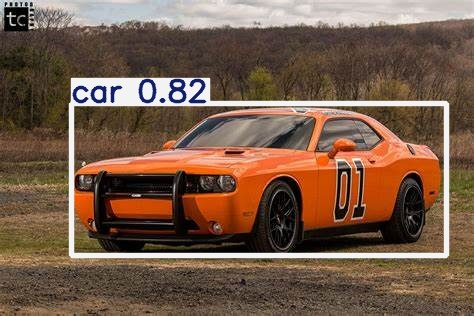

In [34]:
from IPython.display import Image
Image(filename='runs/detect/exp3/myimage.jpeg')